<h1 style="color:green; margin-bottom:15px;font-size:27px">Data Parsing, Extraction and Analysis - Airline Company Data Analysis</h1>

# Project Description

You are an analyst at F9, a Russian airline that is operating hundreds of flights every day. You have to study the database and analyze the demand of passengers for flights to cities where the largest festivals take place. The dataset contains 2 queries from the previous tasks.

# Содержание

<ol>
<li>Libraries Import</li>
<li>Data Import and Preprocessing</li>
<li>Data Description</li>
<li>Data Analysis</li>
<li>Conclusions</li>
</ol>

# 1. Libraries Import

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Import and Preprocessing

In [2]:
models=pd.read_csv('query_1.csv')

display(models)
display(models.info())
models.describe().T

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,count,mean,std,min,25%,50%,75%,max
flights_amount,8.0,2035.625,1965.203947,300.0,605.25,795.0,4250.25,4557.0


In [3]:
flights=pd.read_csv('query_3.csv')

display(flights.head(5))
display(flights.info())
flights.describe().T

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.494189,13.11979,1.0,2.0,3.0,5.870968,129.774194


In [4]:
flights['average_flights']=round(flights['average_flights'],2)
display(flights.head(5))

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45


In [5]:
duplicates = flights[flights['city'].duplicated()]
print(duplicates)

Empty DataFrame
Columns: [city, average_flights]
Index: []


array([[<AxesSubplot:title={'center':'average_flights'}>]], dtype=object)

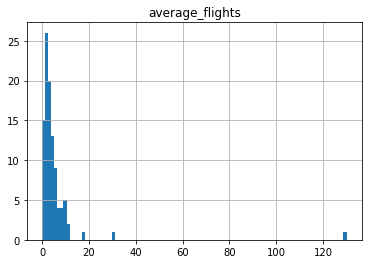

In [6]:
flights.hist('average_flights', bins=100, range=(0, 130))

In [7]:
flights.loc[flights['average_flights'] == 0].count()

city               0
average_flights    0
dtype: int64

# 3. Data Description

*/datasets/query_1.csv* has 8 rows and 2 variables:
<li>model — aircraft model, object type;</li>
<li>flights_amount — number of flights for each aircraft model in September 2018, type int64.</li>

Does not contain gaps, garbage and duplicates. The data types are correct.

*/datasets/query_3.csv* has 101 lines and 2 variables:
<li>city — city, type object;</li>
<li>average_flights is the average number of flights arriving in Moscow per day in August 2018, type float64.</li>

Does not contain gaps, garbage and duplicates. The data types are correct. <br>
The values of average_flights are rounded to 2 decimal places.<br>

# 4. Data Analysis

# 4.1 Top Airplane Models in September 2018

In [8]:
display(models.sort_values(by = 'flights_amount', ascending=False).head(10))

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


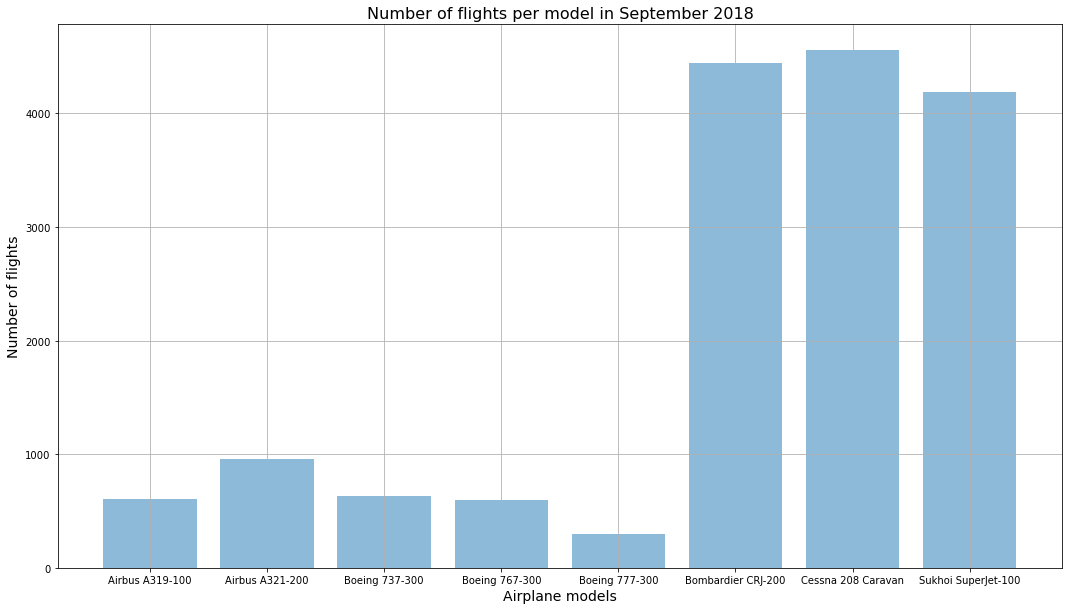

In [9]:
objects = models['model']
y_pos = np.arange(len(models))
performance = models['flights_amount']

plt.figure(figsize=(18, 10))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Airplane models',fontsize=14)
plt.ylabel('Number of flights',fontsize=14)
plt.title('Number of flights per model in September 2018',fontsize=16)
plt.grid()
plt.show()

# Average Number of Flights per City per Day in August 2018

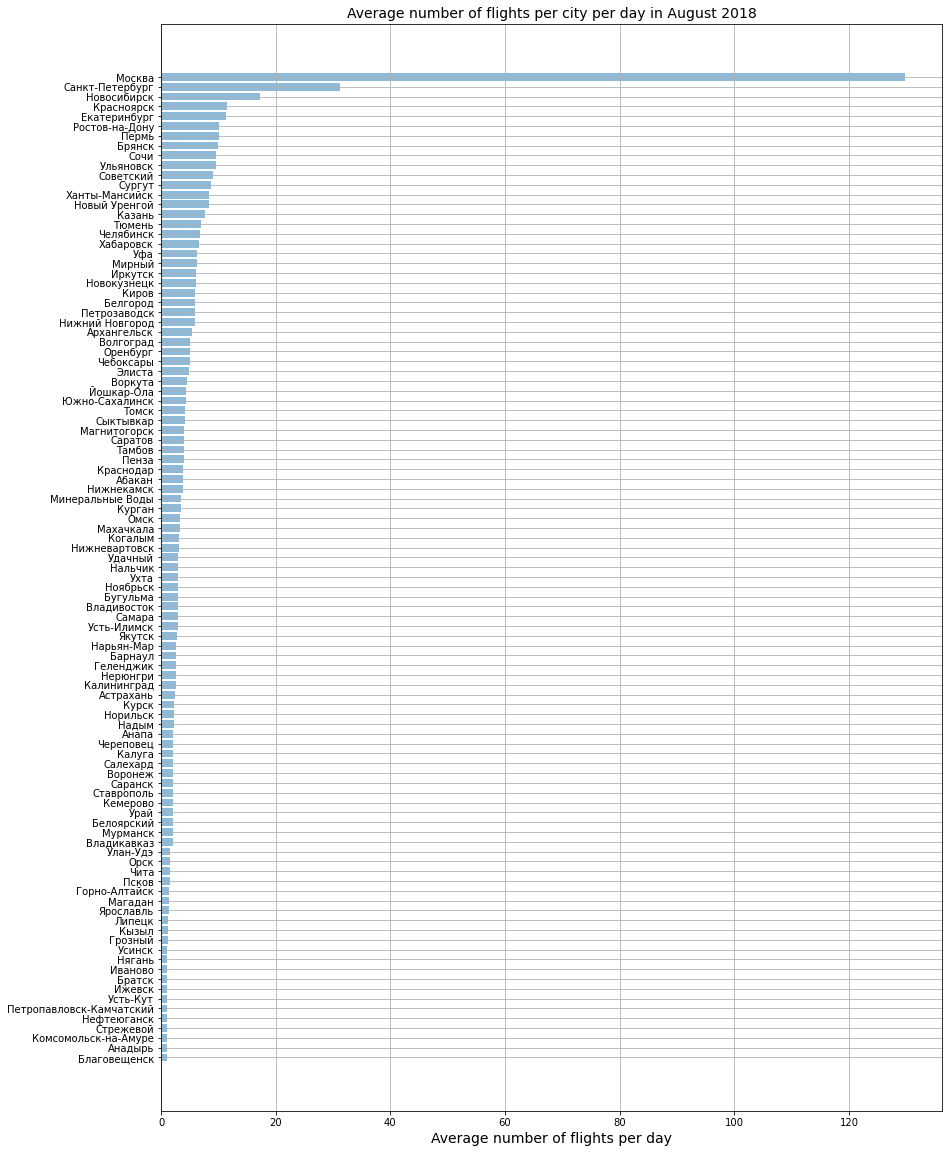

In [10]:
flights = flights.sort_values('average_flights', ascending=True)

objects = flights['city']
y_pos = np.arange(len(flights))
performance = flights['average_flights']

plt.figure(figsize=(14, 20))
plt.barh(y_pos, performance, alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Average number of flights per day',fontsize=14)
plt.title('Average number of flights per city per day in August 2018',fontsize=14)
plt.grid()
plt.show()

# Average Number of Flights per Day per City in August 2018

In [11]:
flights10 = flights.sort_values(by = 'average_flights', ascending=False).head(10)
display(flights10)

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


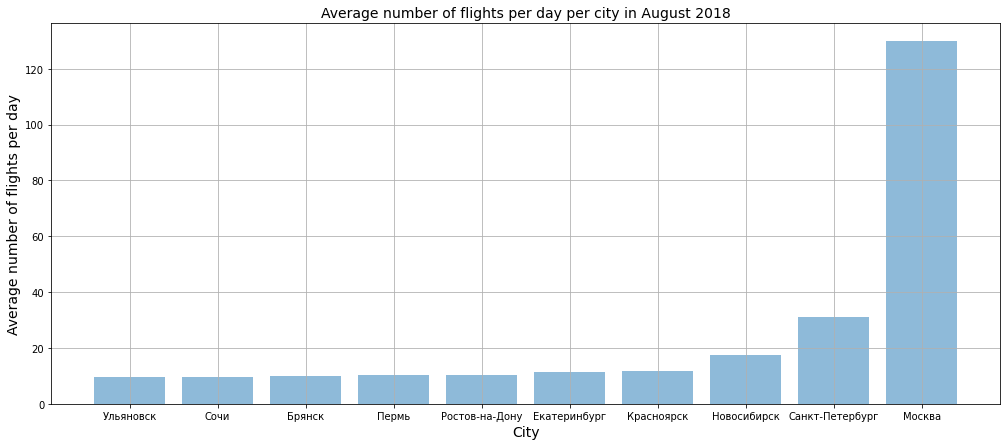

In [12]:
flights10 = flights10.sort_values('average_flights', ascending=True)

objects = flights10['city']
y_pos = np.arange(len(objects))
performance = flights10['average_flights']

plt.figure(figsize=(17, 7))
plt.bar(y_pos, performance, alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average number of flights per day',fontsize=14)
plt.xlabel('City',fontsize=14)
plt.title('Average number of flights per day per city in August 2018',fontsize=14)
plt.grid()
plt.show()

# Conclusions

**1. Flights per Airplane Models**

The most popular aircraft models in September 2018 are **Cessna 208 Caravan** (4557 flights), **Bombardier CRJ-200** (4446 flights), **Sukhoi SuperJet-100** (4185 flights). Other models account for 300 to 960 flights per month.

<table class="dataframe" style="width: 444px; border-style: solid; border-color: black;" border="1">
<thead>
<tr>
<th style="width: 183.531px; text-align: left;">Airplane Models</th>
<th style="width: 244.469px; text-align: left;">Flights per Month</th>
</tr>
</thead>
<tbody>
<tr> 
<td style="width: 183.531px; text-align: left;">Cessna 208 Caravan</td>
<td style="width: 244.469px; text-align: left;">4557</td>
</tr>
<tr>
<td style="width: 183.531px; text-align: left;">Bombardier CRJ-200</td>
<td style="width: 244.469px; text-align: left;">4446</td>
</tr>
<tr>
<td style="width: 183.531px; text-align: left;">Sukhoi SuperJet-100</td>
<td style="width: 244.469px; text-align: left;">4185</td>
</tr>
<tr>
<td style="width: 183.531px; text-align: left;">Airbus A321-200</td>
<td style="width: 244.469px; text-align: left;">960</td>
</tr>
<tr>
<td style="width: 183.531px; text-align: left;">Boeing 737-300</td>
<td style="width: 244.469px; text-align: left;">630</td>
</tr>
<tr>
<td style="width: 183.531px; text-align: left;">Airbus A319-100</td>
<td style="width: 244.469px; text-align: left;">607</td>
</tr>
<tr>
<td style="width: 183.531px; text-align: left;">Boeing 767-300</td>
<td style="width: 244.469px; text-align: left;">600</td>
</tr>
<tr>
<td style="width: 183.531px; text-align: left;">Boeing 777-300</td>
<td style="width: 244.469px; text-align: left;">300</td>
</tr>
</tbody>
</table>

**2. Flights per City**

Since the query contains the average number of flights per day in August 2018 and only 101 cities, the chart for all cities is overloaded. The chart for the top 10 cities by average number of flights per day is more informative.
Top 10 cities by average number of flights in August 2018:

<table class="dataframe" style="height: 234px; width: 496px; border-style: solid; border-color: black;" border="1">
<thead>
<tr style="height: 18px;">
<th style="width: 167.234px; height: 18px; text-align: left;">City</th>
<th style="width: 312.766px; height: 18px; text-align: left;">Average Number of Flights per Day</th>
</tr>
</thead>
<tbody>
<tr style="height: 18px;">
<td style="width: 167.234px; height: 18px; text-align: left;">Moscow</td>
<td style="width: 312.766px; height: 18px; text-align: left;">129.77</td>
</tr>
<tr style="height: 36px;">
<td style="width: 167.234px; height: 36px; text-align: left;">St. Petersburg</td>
<td style="width: 312.766px; height: 36px; text-align: left;">31.16</td>
</tr>
<tr style="height: 18px;">
<td style="width: 167.234px; height: 18px; text-align: left;">Novosibirsk</td>
<td style="width: 312.766px; height: 18px; text-align: left;">17.32</td>
</tr>
<tr style="height: 18px;">
<td style="width: 167.234px; height: 18px; text-align: left;">Krasnoyarsk</td>
<td style="width: 312.766px; height: 18px; text-align: left;">11.58</td>
</tr>
<tr style="height: 18px;">
<td style="width: 167.234px; height: 18px; text-align: left;">Екатеринбург</td>
<td style="width: 312.766px; height: 18px; text-align: left;">11.32</td>
</tr>
<tr style="height: 36px;">
<td style="width: 167.234px; height: 36px; text-align: left;">Rostov-on-Don</td>
<td style="width: 312.766px; height: 36px; text-align: left;">10.19</td>
</tr>
<tr style="height: 18px;">
<td style="width: 167.234px; height: 18px; text-align: left;">Perm</td>
<td style="width: 312.766px; height: 18px; text-align: left;">10.13</td>
</tr>
<tr style="height: 18px;">
<td style="width: 167.234px; height: 18px; text-align: left;">Bryansk</td>
<td style="width: 312.766px; height: 18px; text-align: left;">10.00</td>
</tr>
<tr style="height: 18px;">
<td style="width: 167.234px; height: 18px; text-align: left;">Sochi</td>
<td style="width: 312.766px; height: 18px; text-align: left;">9.61</td>
</tr>
<tr style="height: 18px;">
<td style="width: 167.234px; height: 18px; text-align: left;">Ulyanovsk</td>
<td style="width: 312.766px; height: 18px; text-align: left;">9.58</td>
</tr>
</tbody>
</table>

In top 5 - 4 largest (by number) cities of Russia (Moscow, St. Petersburg, Novosibirsk, Yekaterinburg).

The absolute leader in terms of the number of flights is **Moscow** (an average of 128 flights per day in August 2018. Followed by **St. Petersburg** (31.16 flights) and **Novosibirsk** (17.32 flights). Other cities have an average of 9 to 12 flights per day.

Top-10 most popular cities in August include 3 resorts: Krasnoyarsk, Rostov-on-Don (located on the way to Crimea) and Sochi.

Perm, Ulyanovsk and Bryansk are not among 10 largest cities in Russia and are not resorts, it is difficult for me to explain why they appear in this rating. It can be assumed that the airline offered the best prices for tickets on the market for these destinations.